In [40]:
import os
print(os.getcwd())



c:\Users\archa\Desktop\Clip youtube


In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import string
import nltk
import ast
import seaborn as sns
from nltk.tokenize import word_tokenize



In [42]:
# Download resources once
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
df = pd.read_csv("data/raw/lex_fridman_podcast.csv")

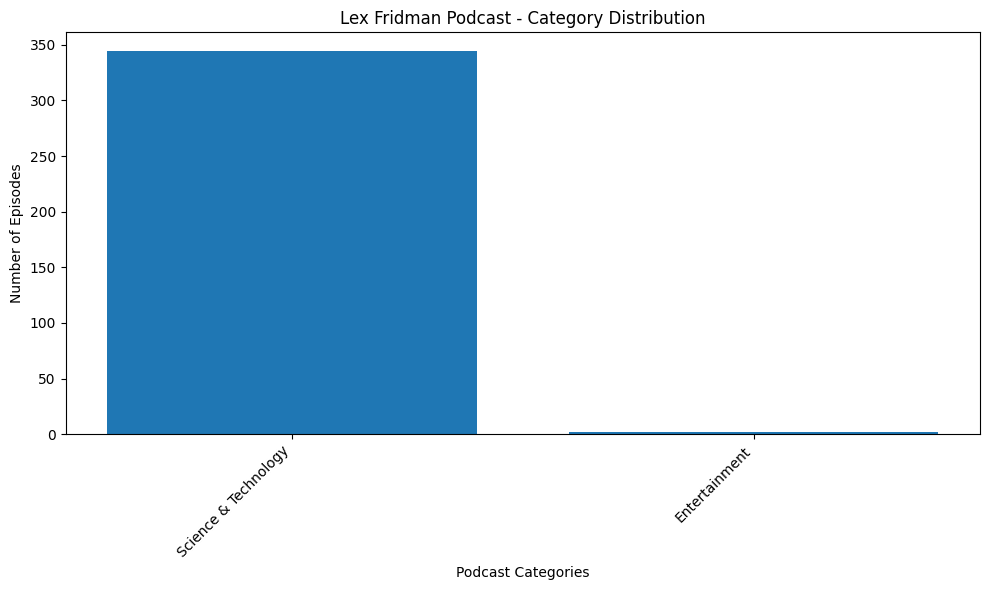

In [44]:
# Safely convert stringified lists in 'categories' to actual lists
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Flatten all categories across episodes
all_categories = [cat.strip() for sublist in df['categories'] for cat in sublist]

# Count frequency of each category
category_counts = Counter(all_categories)

# Convert to DataFrame for plotting
cat_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(cat_df['Category'], cat_df['Count'])
plt.xlabel("Podcast Categories")
plt.ylabel("Number of Episodes")
plt.title("Lex Fridman Podcast - Category Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#. --- Token Frequency ---
text_data = ' '.join(df['text'].dropna())
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def clean_and_tokenize(text):
    tokens = word_tokenize(text.lower())
    return [t for t in tokens if t not in stop_words and t not in punct and t.isalpha()]

tokens = clean_and_tokenize(text_data)
token_counts = Counter(tokens)
top_words_df = pd.DataFrame(token_counts.most_common(20), columns=['Word', 'Frequency'])

# 4. --- Lexical Diversity ---
total_tokens = len(tokens)
unique_tokens = len(set(tokens))
lexical_diversity = unique_tokens / total_tokens if total_tokens > 0 else 0
num_characters = sum(len(token) for token in tokens)
summary_stats = {
    "Total Tokens": total_tokens,
    "Unique Tokens": unique_tokens,
    "Lexical Diversity": round(lexical_diversity, 3),
    "Total Characters": num_characters
}

print("\n3. Top 20 Frequent Words")
print(top_words_df)

print("\n4. Lexical Summary")
print(summary_stats)



3. Top 20 Frequent Words
         Word  Frequency
0        like      90734
1       think      49122
2        know      44002
3      people      36471
4         one      27528
5       right      26486
6        yeah      25220
7       would      24044
8      really      23358
9        kind      22981
10     things      21945
11        way      19961
12        get      19615
13       mean      18604
14      thing      17811
15       well      17584
16        say      17403
17  something      17283
18      going      15914
19      could      15909

4. Lexical Summary
{'Total Tokens': 3457923, 'Unique Tokens': 49381, 'Lexical Diversity': 0.014, 'Total Characters': 20517428}


In [46]:
# Fill missing text with empty string
df['text'] = df['text'].fillna('')

# Define stopwords and punctuation
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)

# Define a text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r'https?:\/\/\S+', '', text)  # remove URLs
    tokens = word_tokenize(text)  # tokenize
    cleaned_tokens = [t for t in tokens if t.isalpha() and t not in stop_words and t not in punctuation]
    return ' '.join(cleaned_tokens)

In [47]:
# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

In [48]:
# View top 10 cleaned entries in notebook
df[['title', 'cleaned_text']].head(10)



,title,cleaned_text
0,Jed Buchwald: Isaac Newton and the Philosophy ...,following conversation jed buckwald professor ...
1,"Sergey Nazarov: Chainlink, Smart Contracts, an...",following conversation sergey nazarov ceo chai...
2,Stephen Wolfram: Fundamental Theory of Physics...,following conversation stephen wolfram second ...
3,"Philip Goff: Consciousness, Panpsychism, and t...",believe official scientific worldview incompat...
4,"Oriol Vinyals: DeepMind AlphaStar, StarCraft, ...",following conversation ariol vinales senior re...
5,"Ray Dalio: Principles, the Economic Machine, A...",following conversation ray dalhiel founder inv...
6,Michael Malice: Totalitarianism and Anarchy | ...,following conversation michael malus michael a...
7,"Tomaso Poggio: Brains, Minds, and Machines | L...",following conversation tommaso poggio professo...
8,"George Hotz: Comma.ai, OpenPilot, and Autonomo...",following conversation george hotz founder kam...
9,"Tim Dillon: Comedy, Power, Conspiracy Theories...",following conversation tim dillon standup come...


In [ ]:
# Create the directory if it doesn't exist
os.makedirs("data/processed", exist_ok=True)

# Save the cleaned dataset
df.to_csv("data/processed/lex_fridman_cleaned.csv", index=False)
print("✅ Cleaned dataset saved to: data/processed/lex_fridman_cleaned.csv")



✅ Cleaned dataset saved to: data/processed/lex_fridman_cleaned.csv


In [ ]:
custom_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
    'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
    'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below',
    'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there',
    'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    'can', 'will', 'just', 'don', 'should', 'now'
}

def tokenize(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = re.findall(r'\b\w+\b', text)
    return [t for t in tokens if t not in custom_stopwords and t not in string.punctuation]

# Apply tokenization
df['tokens'] = df['text'].fillna('').apply(tokenize)


In [ ]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))
lexical_diversity = unique_tokens / total_tokens if total_tokens else 0
avg_len = sum(len(t) for t in all_tokens) / total_tokens if total_tokens else 0

summary_stats = pd.DataFrame([{
    "Total Tokens": total_tokens,
    "Unique Tokens": unique_tokens,
    "Lexical Diversity": round(lexical_diversity, 4),
    "Average Token Length": round(avg_len, 2)
}])
summary_stats


,Total Tokens,Unique Tokens,Lexical Diversity,Average Token Length
0,3829697,50044,0.0131,5.53


In [51]:
# Extract guest name using the last two words before the colon ":" in the title
def extract_guest_name(title):
    if ":" in title:
        pre_colon = title.split(":")[0].strip()
        words = pre_colon.split()
        if len(words) >= 2:
            return " ".join(words[-2:])
        else:
            return pre_colon
    else:
        return title.strip()

# Apply function to extract guest names
df['guest'] = df['title'].apply(extract_guest_name)

# Get unique guest names sorted alphabetically
guest_df = pd.DataFrame(sorted(df['guest'].dropna().unique()), columns=['Guest Name'])

# Show the list using Pandas
guest_df.head(20)


,Guest Name
0,Abbas Amanat
1,Albert Bourla
2,Alex Filippenko
3,Alex Garland
4,Alex Gladstein
5,Alexander Fridman
6,Alien Debate
7,Anca Dragan
8,Andrej Karpathy
9,Andrew Bustamante


In [52]:
# Count how many times each guest appears in the dataset
guest_counts = df['guest'].value_counts()

# Filter guests who appeared more than once
repeated_guests = guest_counts[guest_counts > 1].reset_index()
repeated_guests.columns = ['Guest Name', 'Appearance Count']

# Show the repeated guest list
repeated_guests.head(50)


,Guest Name,Appearance Count
0,Manolis Kellis,4
1,Eric Weinstein,4
2,Michael Malice,4
3,Elon Musk,3
4,Stephen Wolfram,3
5,Andrew Huberman,3
6,Scott Aaronson,2
7,Michael Littman,2
8,Joscha Bach,2
9,Chris Lattner,2


In [ ]:
# Get top 10 repeated guests
top_10_guests = repeated_guests.head(10)['Guest Name'].tolist()

# Analyze what each top guest spoke about by finding frequent words in their cleaned transcripts
guest_topics = {}

for guest in top_10_guests:
    # Filter cleaned text for this guest
    texts = df[df['guest'] == guest]['cleaned_text'].dropna()
    tokens = " ".join(texts).split()
    top_words = Counter(tokens).most_common(5)
    guest_topics[guest] = top_words

# Convert to DataFrame
guest_topic_data = []
for guest, words in guest_topics.items():
    for word, freq in words:
        guest_topic_data.append({"Guest Name": guest, "Keyword": word, "Frequency": freq})

top_guest_topics_df = pd.DataFrame(guest_topic_data)



In [55]:
# Print each guest with their top 5 keywords
for guest in top_guest_topics_df['Guest Name'].unique():
    print(f"\n🎙️ {guest}")
    top_words = top_guest_topics_df[top_guest_topics_df['Guest Name'] == guest]
    for _, row in top_words.iterrows():
        print(f"   🔹 {row['Keyword']} ({row['Frequency']})")



🎙️ Manolis Kellis
   🔹 basically (744)
   🔹 like (549)
   🔹 one (468)
   🔹 know (458)
   🔹 sort (354)

🎙️ Eric Weinstein
   🔹 like (702)
   🔹 think (570)
   🔹 know (554)
   🔹 people (542)
   🔹 well (309)

🎙️ Michael Malice
   🔹 like (2097)
   🔹 think (916)
   🔹 people (885)
   🔹 yeah (609)
   🔹 know (596)

🎙️ Elon Musk
   🔹 like (509)
   🔹 think (212)
   🔹 yeah (169)
   🔹 know (163)
   🔹 people (120)

🎙️ Stephen Wolfram
   🔹 know (1532)
   🔹 kind (892)
   🔹 like (892)
   🔹 things (739)
   🔹 sort (722)

🎙️ Andrew Huberman
   🔹 like (1019)
   🔹 people (579)
   🔹 think (547)
   🔹 know (466)
   🔹 really (363)

🎙️ Scott Aaronson
   🔹 know (900)
   🔹 right (391)
   🔹 like (282)
   🔹 would (205)
   🔹 quantum (198)

🎙️ Michael Littman
   🔹 like (589)
   🔹 think (324)
   🔹 yeah (238)
   🔹 know (234)
   🔹 people (220)

🎙️ Joscha Bach
   🔹 think (315)
   🔹 like (305)
   🔹 people (242)
   🔹 world (241)
   🔹 basically (222)

🎙️ Chris Lattner
   🔹 like (538)
   🔹 things (298)
   🔹 right (256)
   🔹 

In [ ]:
# Fix missing 'guest' column by extracting guest names from titles
def extract_guest_name(title):
    if ":" in title:
        words = title.split(":")[0].split()
        return " ".join(words[-2:]) if len(words) >= 2 else title
    return title

df['guest'] = df['title'].apply(extract_guest_name)

In [ ]:
# Clean 'categories' column to extract the label
df['category_clean'] = df['categories'].astype(str).str.extract(r"\['(.+?)'\]")

# Step 3: Group comparison - Guest-wise stats
guest_stats = []
for guest in df['guest'].dropna().unique():
    guest_df = df[df['guest'] == guest]
    all_tokens = [token for sublist in guest_df['tokens'] for token in sublist]
    total = len(all_tokens)
    unique = len(set(all_tokens))
    diversity = unique / total if total else 0
    avg_len = sum(len(t) for t in all_tokens) / total if total else 0
    top_words = Counter(all_tokens).most_common(3)
    keywords = ", ".join([w for w, _ in top_words])

    guest_stats.append({
        'Guest Name': guest,
        'Total Tokens': total,
        'Unique Tokens': unique,
        'Lexical Diversity': round(diversity, 4),
        'Avg Token Length': round(avg_len, 2),
        'Top Keywords': keywords
    })

custom_noise = {'s', 't', 're', 've', 'll', 'm'}

# Merge with your original stopwords
custom_stopwords = custom_stopwords.union(custom_noise)

guest_comparison_df = pd.DataFrame(guest_stats)

In [ ]:
# Group comparison - Category-wise stats
cat_stats = []
for cat in df['category_clean'].dropna().unique():
    cat_df = df[df['category_clean'] == cat]
    all_tokens = [token for sublist in cat_df['tokens'] for token in sublist]
    total = len(all_tokens)
    unique = len(set(all_tokens))
    diversity = unique / total if total else 0
    avg_len = sum(len(t) for t in all_tokens) / total if total else 0
    top_words = Counter(all_tokens).most_common(3)
    keywords = ", ".join([w for w, _ in top_words])

    cat_stats.append({
        'Category': cat,
        'Total Tokens': total,
        'Unique Tokens': unique,
        'Lexical Diversity': round(diversity, 4),
        'Avg Token Length': round(avg_len, 2),
        'Top Keywords': keywords
    })

category_comparison_df = pd.DataFrame(cat_stats)

guest_comparison_df.head(10), category_comparison_df.head(10)

(        Guest Name  Total Tokens  Unique Tokens  Lexical Diversity  \
 0     Jed Buchwald          7432           1982             0.2667   
 1   Sergey Nazarov         14450           2510             0.1737   
 2  Stephen Wolfram         57781           4627             0.0801   
 3      Philip Goff         12283           2525             0.2056   
 4    Oriol Vinyals         18831           2865             0.1521   
 5        Ray Dalio         12199           2527             0.2071   
 6   Michael Malice         63736           7608             0.1194   
 7    Tomaso Poggio          4695           1395             0.2971   
 8      George Hotz         27702           4039             0.1458   
 9       Tim Dillon         13217           2780             0.2103   
 
    Avg Token Length             Top Keywords  
 0              5.82             s, t, things  
 1              5.90              s, think, t  
 2              5.67            s, know, like  
 3              6.04  s, 